## Propose a project to do while at The Data Incubator. We want to know about your ability to think at a high level. Try to think of projects that users or businesses will care about that are also relatively unanalyzed. Here are some useful links about data sources on our blog as well as the archive of data sources on Data is Plural. You can see some final projects of previous Fellows on our YouTube Page.

## Propose a project that uses a large, publicly accessible dataset. Explain your motivation for tackling this problem, discuss the data source(s) you are using, and explain the analysis you are performing. At a minimum, you will need to do enough exploratory data analysis to convince someone that the project is viable and generate two interesting non-trivial plots or other assets supporting this. Explain the plots and give url links to them. For guidance on how to choose a project, check out this blog post.

## Please provide a general description and justification for your project. *

## 
Problem Statement

As an animal lover, I chose the PetFinder.my - Pawpularity Contest as my capstone project. It's a $25000 prize ongoing competition on kaggle. PetFinder.my is Malaysia’s leading animal welfare platform, featuring over 180,000 animals with 54,000 happily adopted. But there are still millions of stray animals suffer on the streets or are euthanized in shelters every day around the world. We hope that pets with attractive photos can generate more interest and be adopted faster with the help of data science.
The purpose of the project is to accurately determine a pet photo’s appeal and even suggest improvements to give these rescue animals a higher chance of loving homes.


Dataset Information

This dataset has both image data and csv file that store some basic information about the image. There are 9912 image data, with 1.06GB in size, are stored in a jpg image format in training folder and 12 basic features for each photo as well as the target, the photo's Pawpularity score are in the train.csv file where the Id column gives the photo's unique Pet Profile ID corresponding the photo's file name. The Pawpularity score are continuous number in range 0 to 100. The 12 features(Focus, Eyes, Face, Near, Action, Accessory, Group, Collage, Human, Occlusion, Info and Blur) are labeled with the value of 1 (Yes) or 0 (No). 


Expected Outcome

Given a photo of a pet animal and some basic information about the photo, we should be able to estimate the 'pawpularity' score of the pet.


Evaluation

Submissions are evaluated on Root Mean Squared Error(RMSE) between the predicted value and the observed target.


Preliminary Result

Since the Pawpularity score are continuous number from 0 to 100, it's a regression problem.

Anticipated Challenges


## Link to 1st asset. You are highly encouraged to use Heroku apps domain for an app or Github to display a notebook. *

## Link to 2nd asset. You are highly encouraged to use Heroku apps domain for an app or Github to display a notebook. *

## Link to public description of data source: *

## How much data did you analyze (rounded to nearest MB)? *

In [17]:
#install imagehash
#conda install -c scitools imagehash

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - imagehash


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py37hecd8cb5_0         2.9 MB
    imagehash-4.2.1            |     pyhd3eb1b0_0         285 KB
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  imagehash          pkgs/main/noarch::imagehash-4.2.1-pyhd3eb1b0_0

The following packages will be UPDATED:

  conda              conda-forge::conda-4.9.0-py37h2987424~ --> pkgs/main::conda-4.10.3-py37hecd8cb5_0



imagehash-4.2.1      | 285 KB    | ##################################### | 100% 
conda-4.10.3         | 2.9 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying tr

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import kstest
from tqdm.notebook import tqdm
from PIL import Image
import imageio
import math
import warnings
import imagehash

# Activate pandas progress apply bar
tqdm.pandas()

In [2]:
train = pd.read_csv('data/petfinder-pawpularity-score/train.csv')
test = pd.read_csv('data/petfinder-pawpularity-score/test.csv')

In [6]:
# Add image path to Train
def get_image_file_path(image_id):
    return f'data/petfinder-pawpularity-score/train/{image_id}.jpg'

train['file_path'] = train['Id'].apply(get_image_file_path)

In [7]:
train.head()

Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  \
0          0      1        0      0          0     0     0           63   
1          0      0        0      0          0     0     0           42   
2          0      0        0      1          1     0     0           28   
3          0      0        0      0          0     0     0           15   
4          0      1        0      0          0     0     0           72   

                                           file_path  
0  data/petfinder-pawpularity-score/train/0007de1...  
1  data/petfinder-pawpularity-score/train/0009c66...  
2  data/petfinder-pawpularity-score/train/0013fd9...  
3  data/petfinder-pawpularity-score/train/0018df3...  
4  data/petfinder-pawpularity-score/train/001dc95...

# EDA for Metadata

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 15 columns):
Id               9912 non-null object
Subject Focus    9912 non-null int64
Eyes             9912 non-null int64
Face             9912 non-null int64
Near             9912 non-null int64
Action           9912 non-null int64
Accessory        9912 non-null int64
Group            9912 non-null int64
Collage          9912 non-null int64
Human            9912 non-null int64
Occlusion        9912 non-null int64
Info             9912 non-null int64
Blur             9912 non-null int64
Pawpularity      9912 non-null int64
file_path        9912 non-null object
dtypes: int64(13), object(2)
memory usage: 1.1+ MB


In [9]:
#Check missing value
train.isnull().sum()

Id               0
Subject Focus    0
Eyes             0
Face             0
Near             0
Action           0
Accessory        0
Group            0
Collage          0
Human            0
Occlusion        0
Info             0
Blur             0
Pawpularity      0
file_path        0
dtype: int64

Pawpularity Statistics
count    9858.000000
mean       38.066545
std        20.613819
min         1.000000
25%        25.000000
50%        33.000000
75%        46.000000
max       100.000000
Name: Pawpularity, dtype: float64


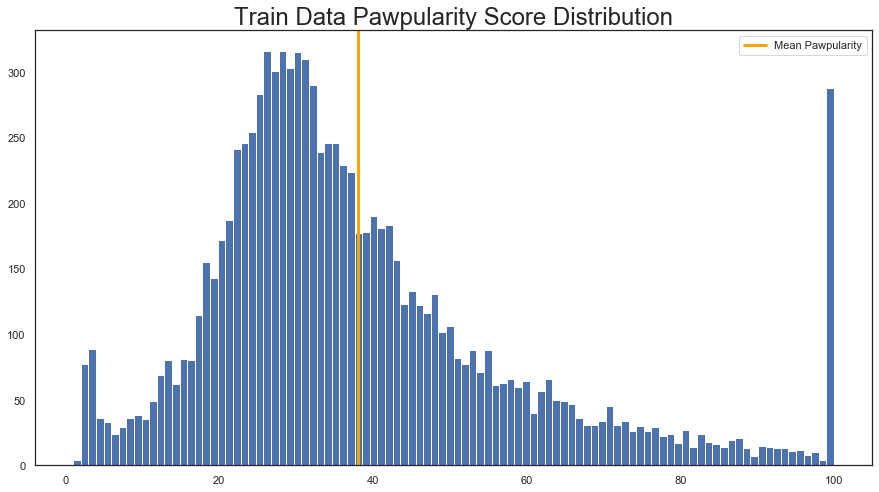

In [35]:
# Pawpularity Score Distribution
print('Pawpularity Statistics')
print(train['Pawpularity'].describe())
plt.figure(figsize=(15,8))
plt.title('Train Data Pawpularity Score Distribution', size=24)
plt.hist(train['Pawpularity'], bins=100)
plt.axvline(train['Pawpularity'].mean(), c='orange', ls='-', lw=3, label="Mean Pawpularity")
plt.legend()
#plt.show()
plt.savefig('fig1_1.pdf')

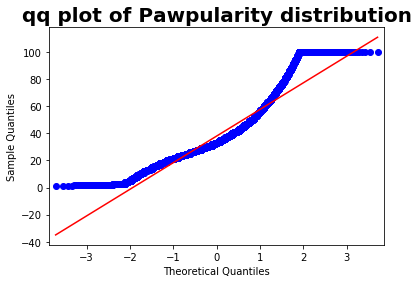

In [11]:
# Use qq plot check the normality of the Pawpularity distribution
qqplot(train['Pawpularity'], line='r')
plt.title('qq plot of Pawpularity distribution', 
          fontsize=20, fontweight='bold')
#plt.show()
plt.savefig('fig1_2.pdf')

In [12]:
# Kolmogorov-Smirnov test 
stat, p = kstest(train['Pawpularity'],'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print(f'Sample follows Gaussian distribution (fail to reject H0 at {int(alpha*100)}% test level)')
else:
    print(f'Sample does not follow Gaussian distribution (reject H0 at {int(alpha*100)}% test level)')

Statistics=0.990, p=0.000
Sample does not follow Gaussian distribution (reject H0 at 5% test level)


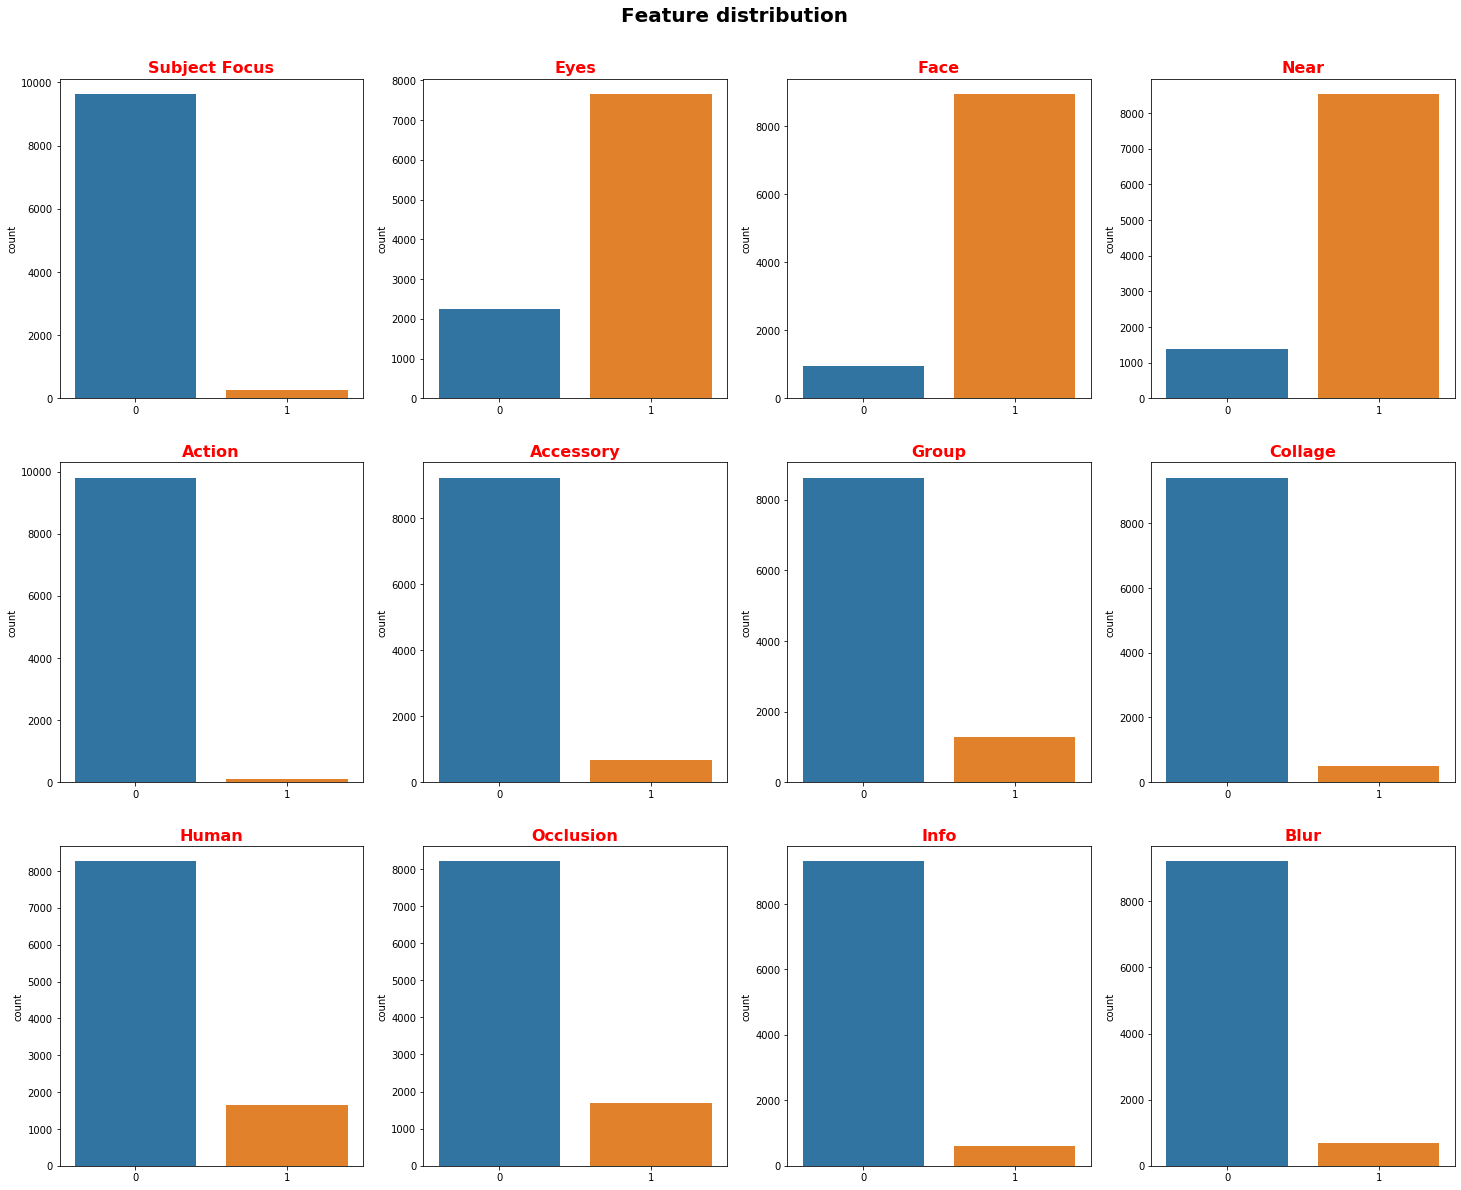

In [13]:
#Distribution of features
predictor = train.columns[1:13]
fig = plt.figure(figsize=(25,20))
for idx, colname in enumerate(predictor):
    ax = plt.subplot(3,4,idx+1)
    sns.countplot(data=train, x=colname, ax=ax)
    ax.set_xlabel(None)
    ax.set_title(colname, fontweight='bold', fontsize = 16, color="red")

plt.suptitle("Feature distribution", y=0.93,
             fontsize=20, fontweight='bold')
#plt.show() 
plt.savefig('fig1_3.pdf')

<Figure size 432x288 with 0 Axes>

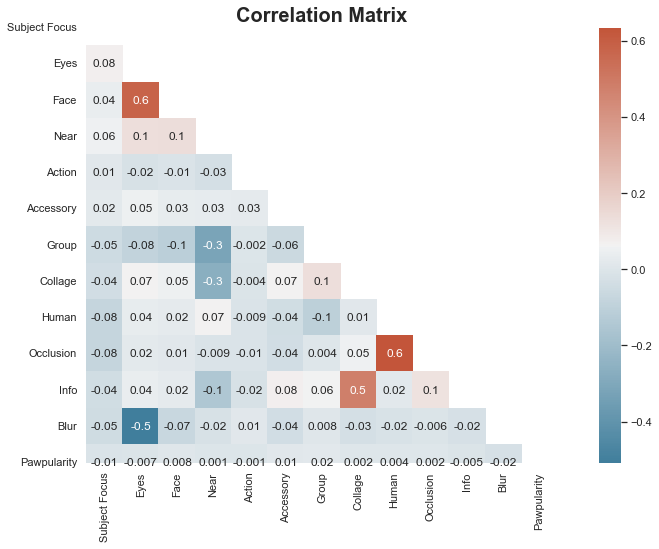

In [14]:
predictor = train.columns[1:14]

corr_matrix = train[predictor].corr()
fig = plt.figure()
plt.figure(figsize=(15,8))
sns.set_theme(style="white")
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap=cmap, 
            mask=mask, square=True)
plt.title('Correlation Matrix', fontsize=20, fontweight='bold')
#plt.show()
plt.savefig('fig1_4.pdf')

In [15]:
predictor = train.columns[1:13]

print(predictor)

corr_matrix = train[predictor].corr()

from numpy.linalg import inv
inv_corr = inv(corr_matrix)

vif_data = pd.DataFrame()
vif_data["feature"] = predictor
vif_data["VIF"] = inv_corr.diagonal()
vif_data = vif_data.sort_values("VIF", ascending=False)
vif_data

Index(['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group',
       'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],
      dtype='object')


feature       VIF
1            Eyes  2.307956
8           Human  1.723615
9       Occlusion  1.721186
2            Face  1.712161
11           Blur  1.510249
7         Collage  1.392512
10           Info  1.328935
3            Near  1.213886
6           Group  1.142908
0   Subject Focus  1.019446
5       Accessory  1.018282
4          Action  1.002690

# EDA for image data

## Found duplicate image by imagehash

In [16]:
# Return the perceptual hash
def get_hash(file_path):
    img = Image.open(file_path)
    img_hash = imagehash.phash(img)
    
    return img_hash.hash.reshape(-1).astype(np.uint8)
    
train['phash'] = train['file_path'].progress_apply(get_hash)

  0%|          | 0/9912 [00:00<?, ?it/s]

  0%|          | 0/9912 [00:00<?, ?it/s]

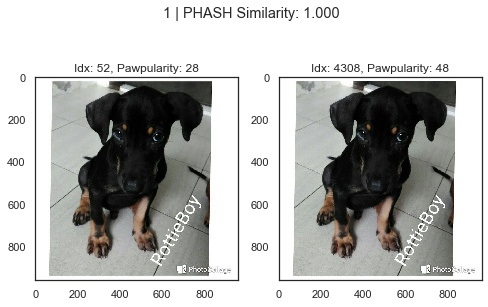

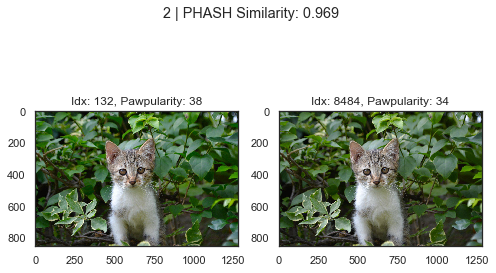

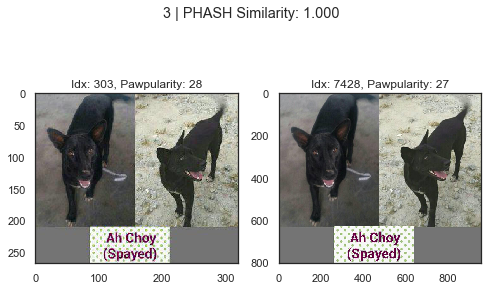

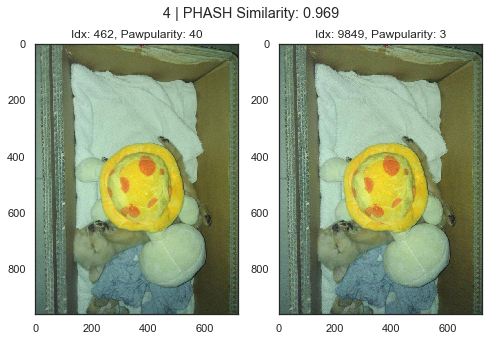

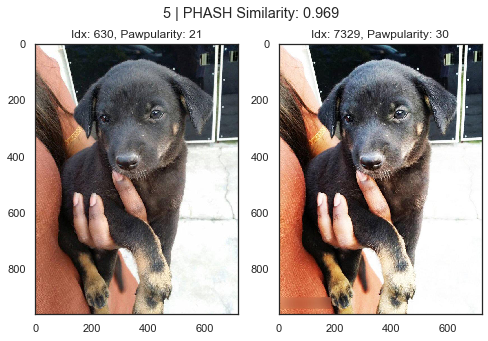

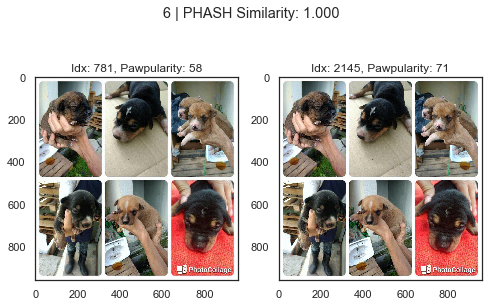

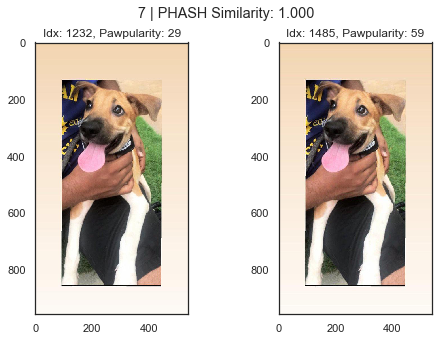

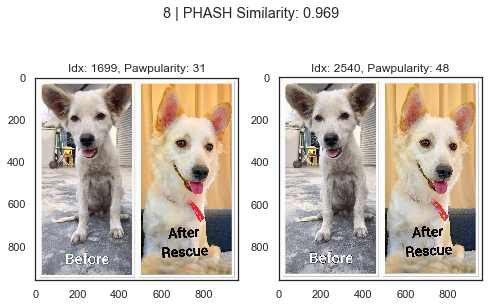

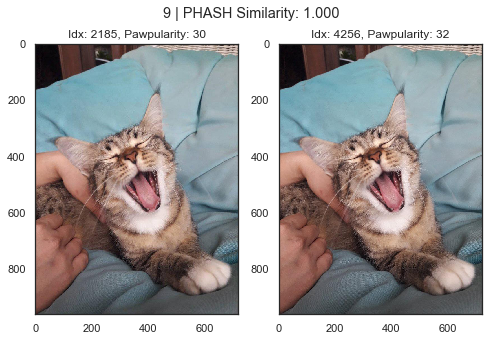

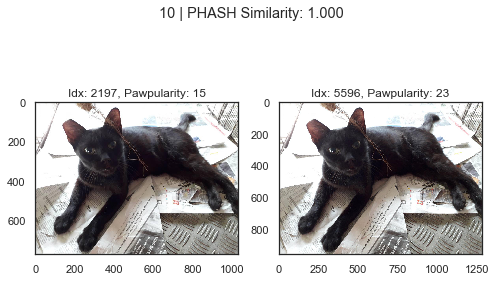

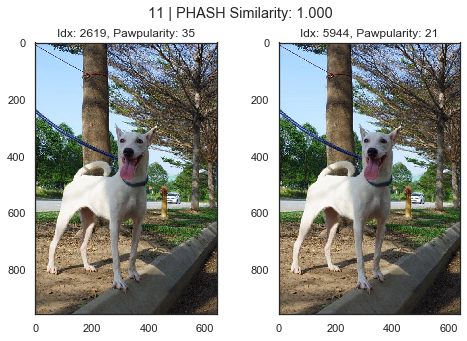

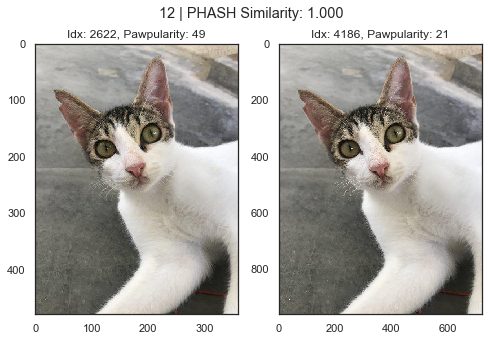

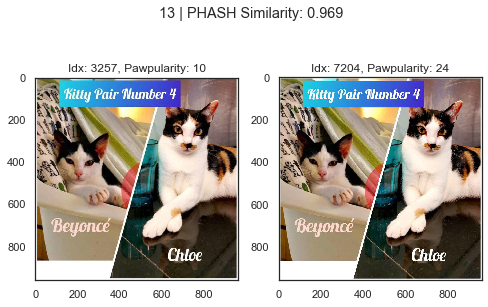

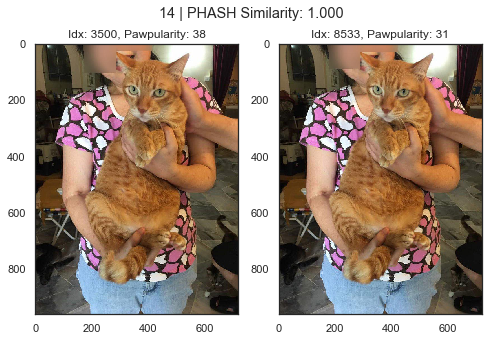

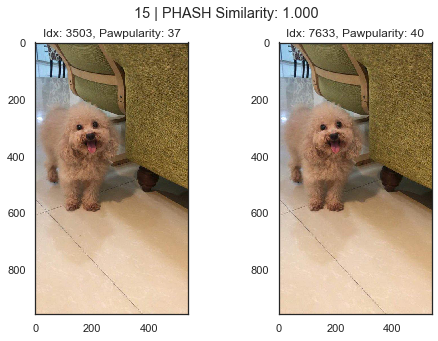

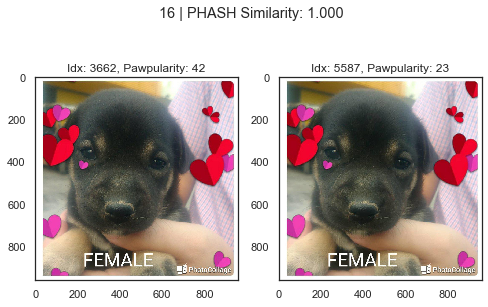

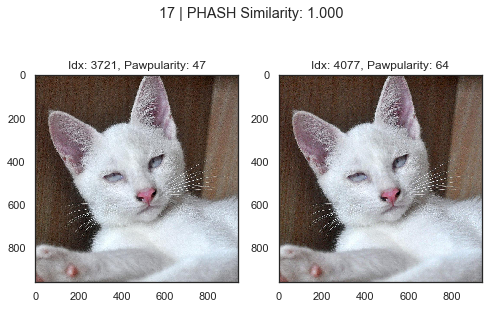

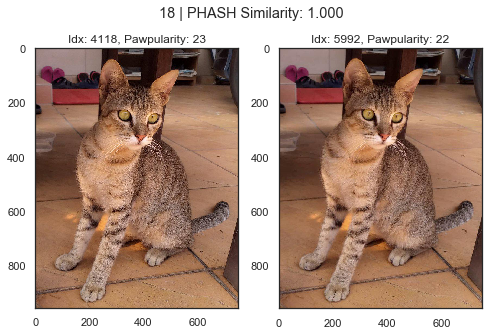

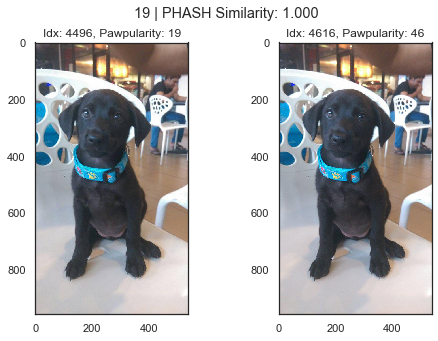

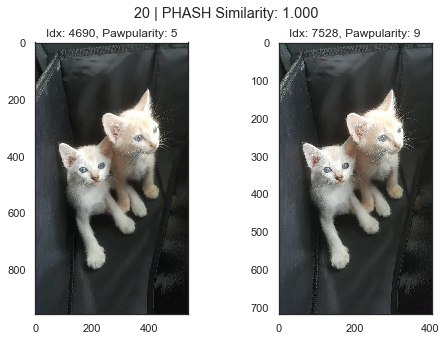

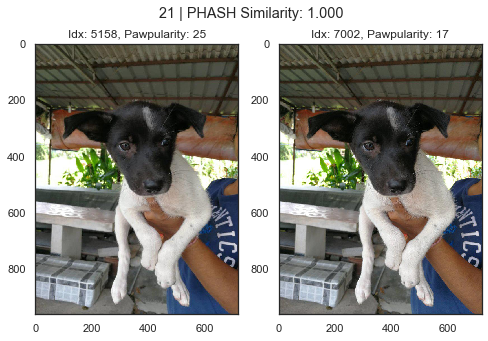

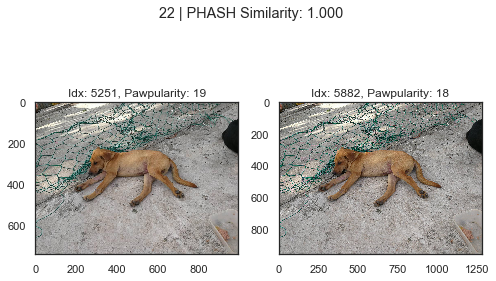

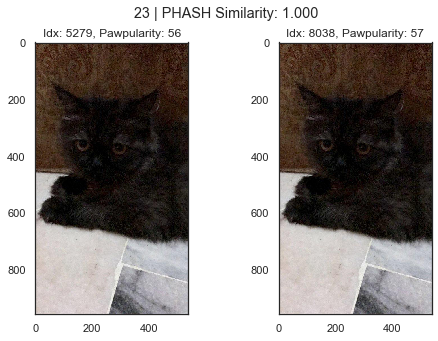

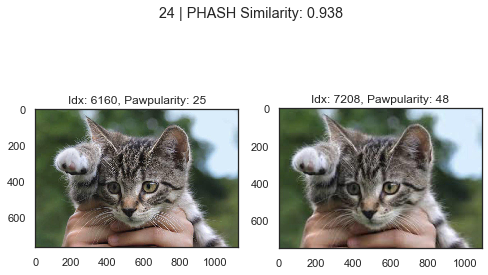

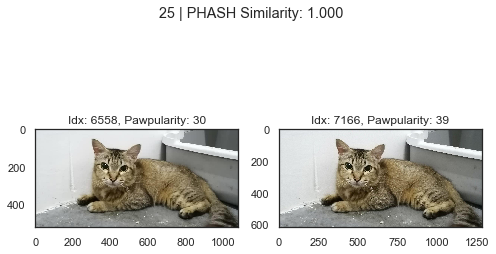

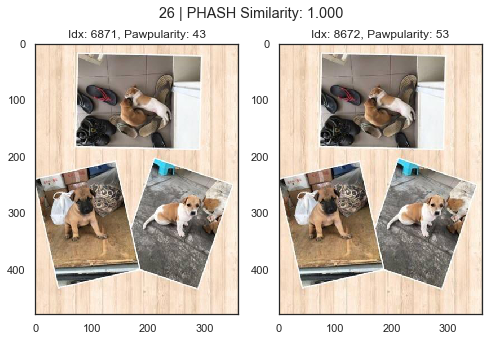

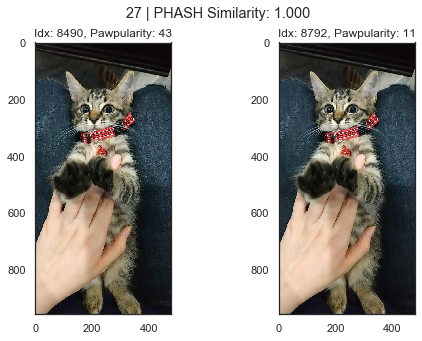

In [17]:
def find_similar_images(threshold=0.90):
    # Number of Duplicate Images Found
    duplicate_counter = 1
    # Indices of Duplicate Images
    duplicate_idxs = set()
    # For each image in the train dataset
    for idx, phash in enumerate(tqdm(train['phash'])):
        # Compute the similarity to all other images
        for idx_other, phash_other in enumerate(train['phash']):
            # Similarity score is imply the percentage of equal bits
            similarity = (phash ==phash_other).mean()
            # Prevent self comparison, threshold similarity and ignore repetetive duplicate detection
            if idx != idx_other and similarity > threshold and not(duplicate_idxs.intersection([idx, idx_other])):
                # Update Duplicate Indices
                duplicate_idxs.update([idx, idx_other])
                # Get DataFrame rows
                row = train.loc[idx]
                row_other = train.loc[idx_other]
                # Plot Duplicate Images
                fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,5))
                ax[0].imshow(imageio.imread(row['file_path']))
                ax[0].set_title(f'Idx: {idx}, Pawpularity: {row["Pawpularity"]}')
                ax[1].imshow(imageio.imread(row_other['file_path']))
                ax[1].set_title(f'Idx: {idx_other}, Pawpularity: {row_other["Pawpularity"]}')
                plt.suptitle(f'{duplicate_counter} | PHASH Similarity: {similarity:.3f}')
                plt.show()
                # Increase Duplicate Counter
                duplicate_counter += 1
                
    # Return Indices of Duplicates
    return duplicate_idxs
    
duplicate_idxs = find_similar_images()

In [18]:
print(f'Found {len(duplicate_idxs)} Duplicate Images')
# Removing Duplicate records
train = train.drop(duplicate_idxs).reset_index(drop=True)

Found 54 Duplicate Images


In [19]:
# Check if images are correctly removed
# DataFrame size reduced by 27*2=54, from 9912 -> 9858
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9858 entries, 0 to 9857
Data columns (total 16 columns):
Id               9858 non-null object
Subject Focus    9858 non-null int64
Eyes             9858 non-null int64
Face             9858 non-null int64
Near             9858 non-null int64
Action           9858 non-null int64
Accessory        9858 non-null int64
Group            9858 non-null int64
Collage          9858 non-null int64
Human            9858 non-null int64
Occlusion        9858 non-null int64
Info             9858 non-null int64
Blur             9858 non-null int64
Pawpularity      9858 non-null int64
file_path        9858 non-null object
phash            9858 non-null object
dtypes: int64(13), object(3)
memory usage: 1.2+ MB


None

In [20]:
widths = []
heights = []
ratios = []
for file_path in tqdm(train['file_path']):
    image = imageio.imread(file_path)
    h, w, _ = image.shape
    heights.append(h)
    widths.append(w)
    ratios.append(w / h)

  0%|          | 0/9858 [00:00<?, ?it/s]

Width Statistics


count    9858.000000
mean      804.522520
std       270.248645
min        90.000000
25%       676.000000
50%       720.000000
75%       960.000000
max      1280.000000
dtype: float64


Height Statistics


count    9858.000000
mean      904.418340
std       156.872505
min       113.000000
25%       909.250000
50%       960.000000
75%       960.000000
max      1280.000000
dtype: float64

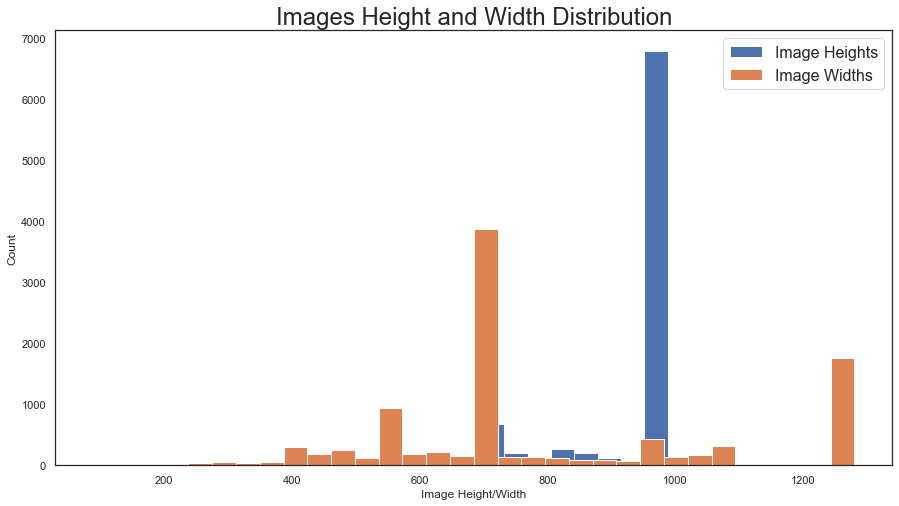

In [36]:
# Images Heigt and Width Distribution
print('Width Statistics')
display(pd.Series(widths).describe())
print()
print('Height Statistics')
display(pd.Series(heights).describe())

plt.figure(figsize=(15,8))
plt.title(f'Images Height and Width Distribution', size=24)
plt.hist(heights, bins=32, label='Image Heights')
plt.hist(widths, bins=32, label='Image Widths')
plt.legend(prop={'size': 16})
plt.xlabel("Image Height/Width")
plt.ylabel("Count")
#plt.show()
plt.savefig('fig2_1.pdf')

Ratio Statistics


count    9858.000000
mean        0.909790
std         0.337642
min         0.326042
25%         0.750000
50%         0.750000
75%         1.039428
max         3.152709
dtype: float64

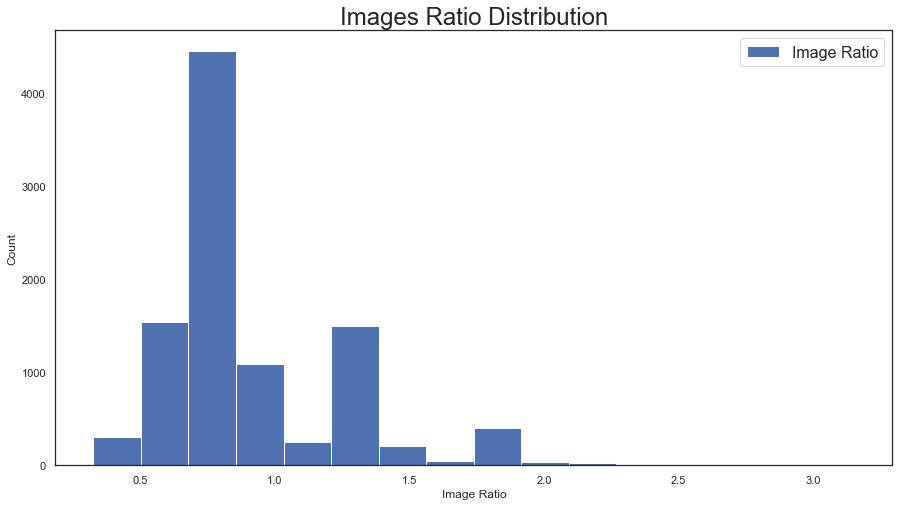

In [37]:
# Images Ratio Distribution
print('Ratio Statistics')
display(pd.Series(ratios).describe())
plt.figure(figsize=(15,8))
plt.title(f'Images Ratio Distribution', size=24)
plt.hist(ratios, bins=16, label='Image Ratio')
plt.legend(prop={'size': 16})
plt.xlabel("Image Ratio")
plt.ylabel("Count")
#plt.show()
plt.savefig('fig2_2.pdf')

## View extreme cases

In [24]:
# Shows 16 images 
def show_batch_df(df, rows=4, cols=4):
    df = df.copy().reset_index()
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*4, rows*4))
    for r in range(rows):
        for c in range(cols):
            idx = r * cols + c
            img = imageio.imread(df.loc[idx, 'file_path'])
            axes[r, c].imshow(img)
            axes[r, c].set_title(f'{idx}, Score: {df.loc[idx, "Pawpularity"]}')

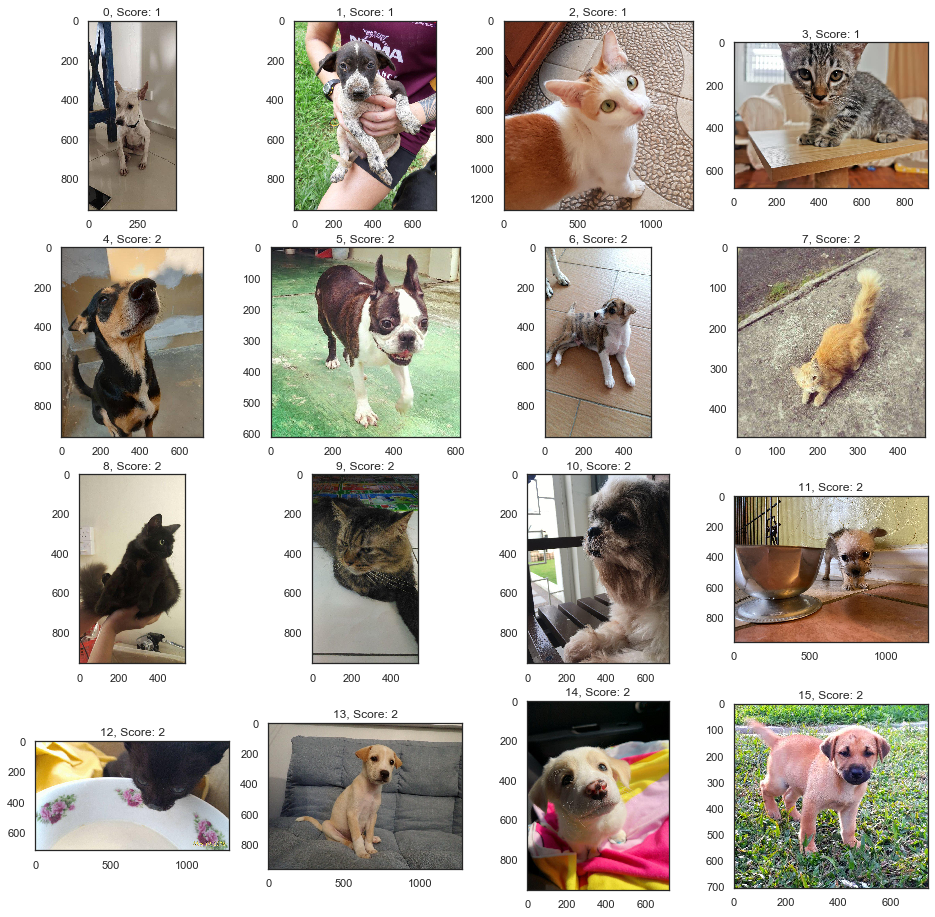

In [25]:
# Shows 16 images with smallest score
show_batch_df(train.sort_values('Pawpularity'))

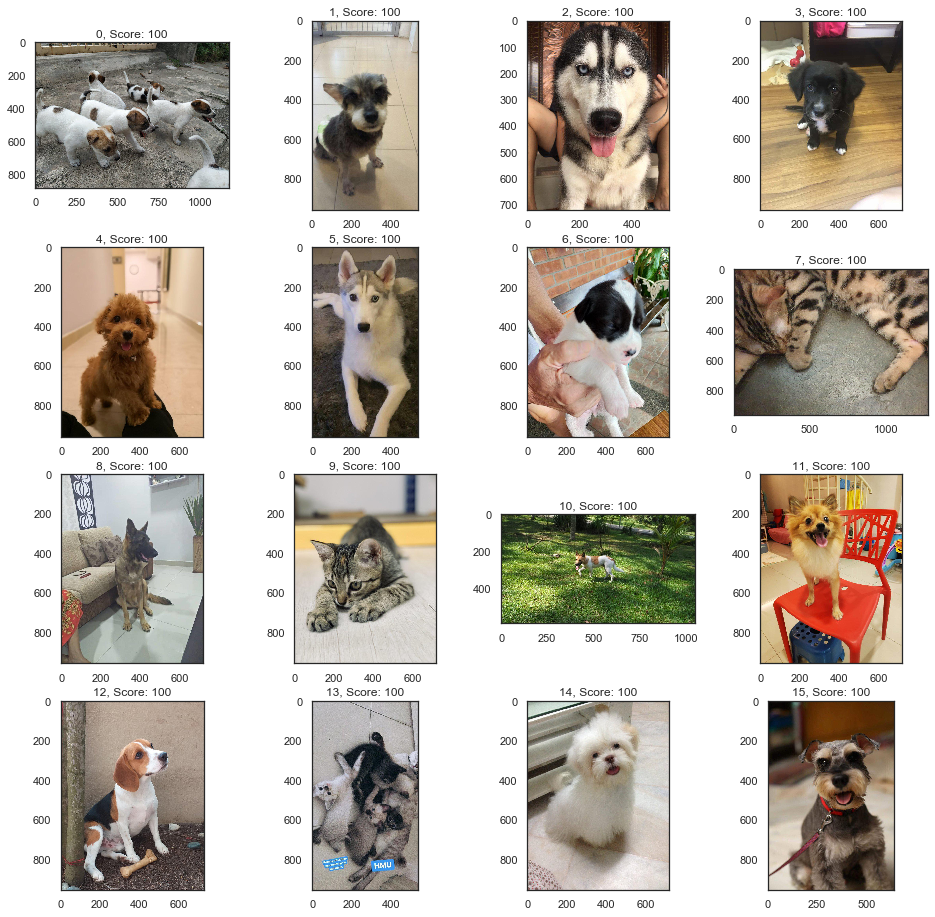

In [26]:
# Shows 16 images with highest score
show_batch_df(train.sort_values('Pawpularity', ascending=False))

## RandomForestRegressor, on the Metadata.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [28]:
predictor = train.columns[1:13]
X = train[predictor]

y = train["Pawpularity"].values
y = y/100

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("-"*80)
print("Train and test split sizes")
print("-"*80)
print(f"X_train : {X_train.shape}")
print(f"X_test : {X_valid.shape}")
print(f"y_train : {y_train.shape[0]}")
print(f"y_test : {y_valid.shape[0]}")
print("-"*80)

--------------------------------------------------------------------------------
Train and test split sizes
--------------------------------------------------------------------------------
X_train : (7886, 12)
X_test : (1972, 12)
y_train : 7886
y_test : 1972
--------------------------------------------------------------------------------


In [29]:
rfr = RandomForestRegressor(random_state=8)
param_grid = {
            "n_estimators" : [100, 250, 500],
            "max_features" : ["log2", "sqrt"],
            "bootstrap"    : [True, False]
        }

grid_rfr = GridSearchCV(
    rfr,
    param_grid,
    cv = 5,
    verbose=1,
    n_jobs=-1)

best_rfr = grid_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   22.6s finished


In [30]:
print("-"*80)
print("Best parameters for Random Forest model")
print("-"*80)
print(best_rfr.best_params_)
print("-"*80)

--------------------------------------------------------------------------------
Best parameters for Random Forest model
--------------------------------------------------------------------------------
{'bootstrap': True, 'max_features': 'log2', 'n_estimators': 500}
--------------------------------------------------------------------------------


<Figure size 864x576 with 0 Axes>

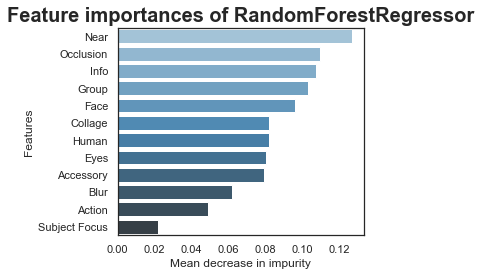

In [32]:
importances = best_rfr.best_estimator_.feature_importances_

feature_names = X_train.columns
forest_importances = pd.DataFrame(importances, columns=["FI"], index=feature_names)
forest_importances = forest_importances.sort_values("FI", ascending=False)

fig = plt.figure(figsize=(12,8))
fig, ax = plt.subplots()
sns.barplot(data=forest_importances, x = "FI", 
            y=forest_importances.index, ax=ax, 
            palette="Blues_d")
ax.set_title("Feature importances of RandomForestRegressor", 
             fontsize=20, fontweight='bold')
ax.set_xlabel("Mean decrease in impurity")
ax.set_ylabel("Features")
fig.tight_layout()

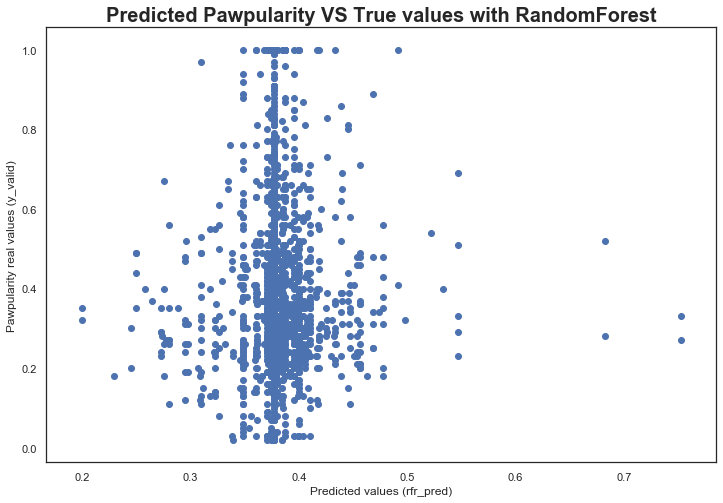

In [33]:
rfr_pred = best_rfr.predict(X_valid)
fig = plt.figure(figsize=(12,8))
plt.scatter(x=rfr_pred, y=y_valid)
plt.ylabel("Pawpularity real values (y_valid)")
plt.xlabel("Predicted values (rfr_pred)")
plt.title("Predicted Pawpularity VS True values with RandomForest", 
          fontsize=20, fontweight='bold')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    """Numpy RMSE"""
    return np.sqrt(mean_squared_error(y_true, y_pred))
print(f"Train RMSE: {rmse(y_train, best_rfr.predict(X_train)).round(4)}")
print(f"Test RMSE: {rmse(y_valid, best_rfr.predict(X_valid)).round(4)}")

Train RMSE: 0.2031
Test RMSE: 0.2064
